In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

이전 챕터에서와 마찬가지로 기본 글꼴 크기를 정의하여 그림을 더 예쁘게 만들어 보겠습니다:
그리고 images/decision_trees 폴더를 만들고(아직 존재하지 않는 경우), 이 노트북을 통해 책에 사용할 그림을 고해상도로 저장하는 데 사용되는 save_fig() 함수를 정의해 보겠습니다:

In [24]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [25]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [26]:
data_df = pd.read_csv('./sample_merge_data_label.csv')
data_df = data_df.set_index('filename')
data_df

,e_magic,e_lfanew,e_minalloc,e_ovno,Signature,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,...,byte_entropy_histogram247,byte_entropy_histogram248,byte_entropy_histogram249,byte_entropy_histogram250,byte_entropy_histogram251,byte_entropy_histogram252,byte_entropy_histogram253,byte_entropy_histogram254,byte_entropy_histogram255,label
filename,,,,,,,,,,,,,,,,,,,,,
8fdbf97786493f9a1943b4102a5ef358eb1aae7411a8b1aae9fd897c40fd748d,23117,224,0,0,17744,0,4,1437047850,0,0,...,84,92,86,85,88,84,89,88,87,2
64f01adf8e6447ebd1f74bc687cc7797cd6f394f89b2e2d195f0f4f620e502d3,23117,208,0,0,17744,0,3,1260567097,0,0,...,17,12,13,13,10,15,10,13,12,2
6590ad0c22d1dc0688d2d1381c8f5d1a5c640495ba62e06f01271cb2f6ff760c,23117,232,0,0,17744,0,4,1379918555,0,0,...,12,12,12,12,12,12,14,14,12,2
8ff41d8e82813739ce0ae44fb891fccdc60ea3a06a1f07809db14d04786832c8,23117,304,0,0,17744,0,5,1514079407,0,0,...,0,0,0,0,0,0,0,0,0,1
679afc88b193d7ff3b96f04e1b7d4e07db58943ca045ff868e75c7f1d295821f,23117,304,0,0,17744,0,5,1516386218,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c104ee3e91910bd4a824337628485fce73abe60378ac13f22200a6a1c8150b0c,23117,248,0,0,17744,0,5,1414156690,0,0,...,11,0,8,16,16,16,16,16,16,2
571ce5cfabf9670c01fcd4fbee1803ca4448e888ab68864c7ce821fd2af602fe,23117,248,0,0,17744,0,8,1406117385,0,0,...,0,0,0,0,0,0,0,0,0,1
65b4ad1bf05a4d714629a2b7e7b0bd86539f387526693ef137cc33b274e5a40f,23117,256,15,26,17744,0,8,708992537,0,0,...,16,16,16,16,16,16,16,16,15,0


In [27]:
data_df.describe()

,e_magic,e_lfanew,e_minalloc,e_ovno,Signature,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,...,byte_entropy_histogram247,byte_entropy_histogram248,byte_entropy_histogram249,byte_entropy_histogram250,byte_entropy_histogram251,byte_entropy_histogram252,byte_entropy_histogram253,byte_entropy_histogram254,byte_entropy_histogram255,label
count,5400.0,5400.000000,5400.000000,5400.000000,5400.0,5400.0,5400.000000,5.400000e+03,5.400000e+03,5.400000e+03,...,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,23117.0,238.511111,111.568148,13.702778,17744.0,0.0,4.818704,1.385127e+09,1.004454e+06,4.280861e+05,...,9.513519,11.627593,13.762963,14.802778,14.783148,14.948704,15.554444,15.700185,15.634444,0.996296
std,0.0,60.316037,1793.134799,649.183661,0.0,0.0,1.787648,2.242294e+08,6.029911e+07,2.865190e+07,...,42.188301,43.288926,45.843777,47.181613,46.469126,47.907306,47.218953,47.265279,47.068138,0.813382
min,23117.0,12.000000,0.000000,0.000000,17744.0,0.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23117.0,216.000000,0.000000,0.000000,17744.0,0.0,4.000000,1.327873e+09,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23117.0,248.000000,0.000000,0.000000,17744.0,0.0,4.000000,1.459954e+09,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23117.0,272.000000,0.000000,0.000000,17744.0,0.0,5.000000,1.515589e+09,0.000000e+00,0.000000e+00,...,10.000000,15.000000,13.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,2.000000
max,23117.0,2248.000000,30566.000000,44800.000000,17744.0,0.0,17.000000,3.415007e+09,4.283477e+09,2.095789e+09,...,633.000000,640.000000,656.000000,662.000000,632.000000,674.000000,655.000000,664.000000,657.000000,2.000000


In [29]:
data = data_df.drop(columns=["label"])
data.describe()

,e_magic,e_lfanew,e_minalloc,e_ovno,Signature,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,...,byte_entropy_histogram246,byte_entropy_histogram247,byte_entropy_histogram248,byte_entropy_histogram249,byte_entropy_histogram250,byte_entropy_histogram251,byte_entropy_histogram252,byte_entropy_histogram253,byte_entropy_histogram254,byte_entropy_histogram255
count,5400.0,5400.000000,5400.000000,5400.000000,5400.0,5400.0,5400.000000,5.400000e+03,5.400000e+03,5.400000e+03,...,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,23117.0,238.511111,111.568148,13.702778,17744.0,0.0,4.818704,1.385127e+09,1.004454e+06,4.280861e+05,...,10.737963,9.513519,11.627593,13.762963,14.802778,14.783148,14.948704,15.554444,15.700185,15.634444
std,0.0,60.316037,1793.134799,649.183661,0.0,0.0,1.787648,2.242294e+08,6.029911e+07,2.865190e+07,...,42.627020,42.188301,43.288926,45.843777,47.181613,46.469126,47.907306,47.218953,47.265279,47.068138
min,23117.0,12.000000,0.000000,0.000000,17744.0,0.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23117.0,216.000000,0.000000,0.000000,17744.0,0.0,4.000000,1.327873e+09,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23117.0,248.000000,0.000000,0.000000,17744.0,0.0,4.000000,1.459954e+09,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23117.0,272.000000,0.000000,0.000000,17744.0,0.0,5.000000,1.515589e+09,0.000000e+00,0.000000e+00,...,12.000000,10.000000,15.000000,13.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000
max,23117.0,2248.000000,30566.000000,44800.000000,17744.0,0.0,17.000000,3.415007e+09,4.283477e+09,2.095789e+09,...,648.000000,633.000000,640.000000,656.000000,662.000000,632.000000,674.000000,655.000000,664.000000,657.000000


In [30]:
label = data_df["label"]
label

filename
8fdbf97786493f9a1943b4102a5ef358eb1aae7411a8b1aae9fd897c40fd748d    2
64f01adf8e6447ebd1f74bc687cc7797cd6f394f89b2e2d195f0f4f620e502d3    2
6590ad0c22d1dc0688d2d1381c8f5d1a5c640495ba62e06f01271cb2f6ff760c    2
8ff41d8e82813739ce0ae44fb891fccdc60ea3a06a1f07809db14d04786832c8    1
679afc88b193d7ff3b96f04e1b7d4e07db58943ca045ff868e75c7f1d295821f    1
                                                                   ..
c104ee3e91910bd4a824337628485fce73abe60378ac13f22200a6a1c8150b0c    2
571ce5cfabf9670c01fcd4fbee1803ca4448e888ab68864c7ce821fd2af602fe    1
65b4ad1bf05a4d714629a2b7e7b0bd86539f387526693ef137cc33b274e5a40f    0
badb5e2fe5460cc319d85dc4afa149561161ed0fd447316a6da6373a7dc9342b    1
725d1ef26fe1d13a822bae06dfeed5e76c90b36f8e64312e2d920de31a04c3d8    0
Name: label, Length: 5400, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

tr_X, te_X, tr_y, te_y = train_test_split(data, label, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(tr_X, tr_y)

DecisionTreeClassifier(max_depth=2, random_state=42)

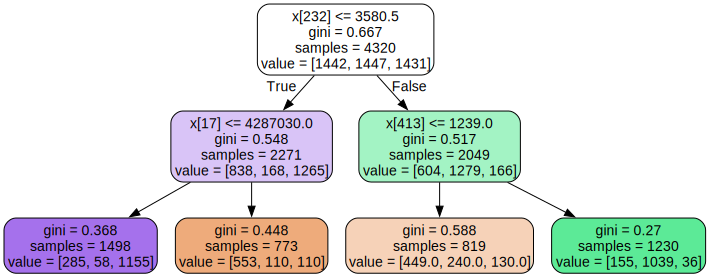

In [33]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "Malware.dot"),  # 경로가 책과 다릅니다.
        #feature_names=["petal length (cm)", "petal width (cm)"],
        #class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file(IMAGES_PATH / "Malware.dot")  # 경로가 책과 다릅니다.

In [11]:
# 추가 코드
#!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

In [35]:
tree_clf.score(te_X, te_y)

0.7435185185185185

In [36]:
pred_y = tree_clf.predict(te_X)
print(pred_y)
#print(te_y['label'].tolist())

[1 2 2 ... 1 1 1]


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print("[Classification Report]\n\n",classification_report(te_y, pred_y))
print(f"{'='*60}\n")
print("[Confusion Matrix]\n\n",confusion_matrix(te_y, pred_y))

[Classification Report]

               precision    recall  f1-score   support

           0       0.64      0.70      0.67       354
           1       0.85      0.73      0.79       381
           2       0.76      0.81      0.78       345

    accuracy                           0.74      1080
   macro avg       0.75      0.74      0.74      1080
weighted avg       0.75      0.74      0.75      1080


[Confusion Matrix]

 [[247  39  68]
 [ 83 278  20]
 [ 58   9 278]]


RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(max_depth=50, random_state=0)
#random_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
random_clf.fit(tr_X, tr_y)
random_clf.score(te_X, te_y)

0.9259259259259259

In [39]:
pred_y = random_clf.predict(te_X)
print(pred_y)
#print(te_y['label'].tolist())

[0 0 2 ... 1 1 1]


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("[Classification Report]\n\n",classification_report(te_y, pred_y))
print(f"{'='*60}\n")
print("[Confusion Matrix]\n\n",confusion_matrix(te_y, pred_y))

[Classification Report]

               precision    recall  f1-score   support

           0       0.86      0.94      0.90       354
           1       0.97      0.96      0.97       381
           2       0.95      0.87      0.91       345

    accuracy                           0.93      1080
   macro avg       0.93      0.92      0.93      1080
weighted avg       0.93      0.93      0.93      1080


[Confusion Matrix]

 [[334   7  13]
 [ 14 365   2]
 [ 41   3 301]]


In [41]:
# 특성 중요도 확인 (어떤 특성이 분류에 더 중요한가)
feature_importances = random_clf.feature_importances_
feature_importances

array([0.00000000e+00, 1.20593342e-02, 1.08059713e-03, 2.68750318e-03,
       0.00000000e+00, 0.00000000e+00, 7.38340269e-03, 7.01039905e-03,
       1.34600119e-05, 5.62147392e-05, 1.53227189e-04, 3.06411944e-03,
       1.66501757e-04, 1.59161014e-02, 2.38241419e-02, 7.60279210e-03,
       3.49672233e-03, 2.01149164e-02, 9.57508743e-04, 1.87940197e-04,
       7.94790888e-03, 1.32153227e-03, 4.59744666e-03, 0.00000000e+00,
       3.47368132e-06, 0.00000000e+00, 8.62266859e-03, 5.46886908e-04,
       1.50159289e-03, 2.84708943e-03, 7.90628906e-04, 6.08563246e-04,
       5.09215867e-03, 1.51107187e-03, 1.79270333e-03, 1.25083226e-03,
       1.97449094e-03, 1.86242315e-03, 3.11882997e-03, 5.49344154e-04,
       8.82523731e-04, 1.06463470e-03, 5.20022127e-04, 7.12546276e-03,
       3.52658343e-03, 5.51612697e-04, 5.96915590e-04, 1.05706929e-03,
       8.62982034e-04, 4.18088523e-03, 8.93436503e-04, 3.86803940e-04,
       2.08276764e-03, 5.66572869e-04, 1.47296400e-03, 7.63869993e-04,
      


특성 중요도:
AddressOfEntryPoint        0.023824
EntryPoint                 0.020115
byte_histogram204          0.020043
SizeOfCode                 0.015916
byte_histogram32           0.012245
                             ...   
CompareNumberOfSections    0.000000
Machine                    0.000000
Subsystem                  0.000000
Signature                  0.000000
e_magic                    0.000000
Length: 540, dtype: float64


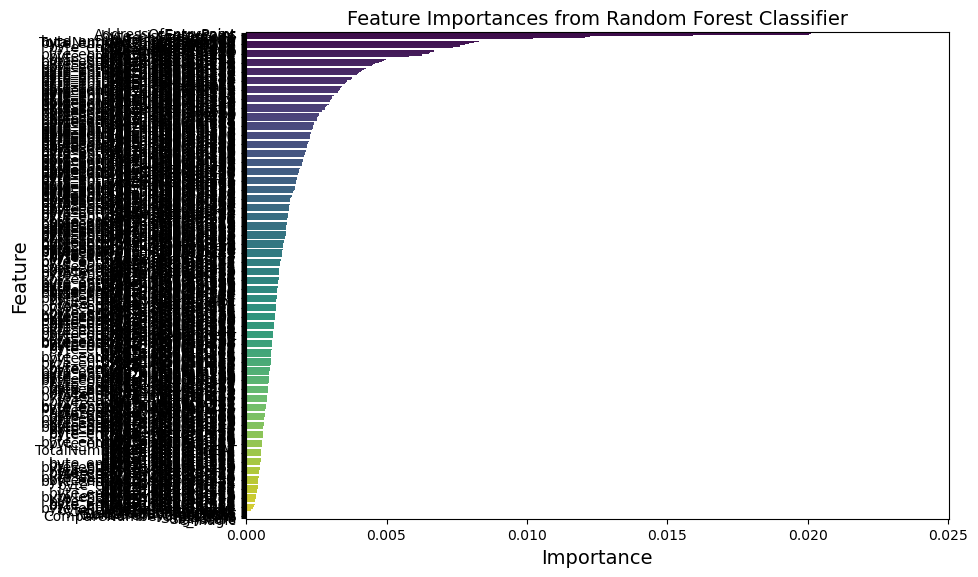

In [42]:
feature_importance_series = pd.Series(feature_importances, index=data.columns)
print("\n특성 중요도:")
print(feature_importance_series.sort_values(ascending=False))

# 4. 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_series.sort_values(ascending=False).values,
            y=feature_importance_series.sort_values(ascending=False).index,
            palette='viridis') # 색상 팔레트 설정

plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # 그래프 요소들이 겹치지 않게 자동 조정
plt.show()


In [20]:
#for i, importance in enumerate(feature_importances):
#    print(f"특성 '{data.feature_names[i]}': {importance:.4f}")

In [45]:
from sklearn.model_selection import GridSearchCV

# 2. 하이퍼파라미터 탐색 공간 정의 (param_grid)
# 탐색할 하이퍼파라미터와 각 파라미터의 값들을 딕셔너리 형태로 정의합니다.
param_grid = {
    'n_estimators': [50, 100, 150, 200], # 트리의 개수
    'max_depth': [None, 10, 20, 30],     # 트리의 최대 깊이 (None은 제한 없음)
    'min_samples_split': [2, 5, 10],     # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]        # 리프 노드가 되기 위한 최소 샘플 수
}

In [46]:
# 3. GridSearchCV 객체 생성
# estimator: 튜닝할 모델 (여기서는 RandomForestClassifier)
# param_grid: 탐색할 하이퍼파라미터 조합
# cv: 교차 검증 폴드 수 (예: 5-fold cross-validation)
# scoring: 모델 성능을 평가할 지표 (분류는 'accuracy', 회귀는 'neg_mean_squared_error' 등)
# n_jobs: 병렬 처리할 코어 수 (-1은 모든 코어 사용)
# verbose: 진행 상황 출력 레벨 (높을수록 상세)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)



In [48]:
# 4. GridSearchCV 훈련 (최적의 파라미터 조합 찾기)
print("\n그리드 서치 시작...")
#tr_X, te_X, tr_y, te_y
grid_search.fit(tr_X, tr_y)
print("그리드 서치 완료.")




그리드 서치 시작...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

In [ ]:
# 5. 최적의 하이퍼파라미터와 성능 확인
print(f"\n최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 점수 (정확도): {grid_search.best_score_:.4f}")

# 6. 최적의 모델로 예측 및 최종 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(te_X)

print(f"\n최적 모델의 테스트 세트 정확도: {accuracy_score(te_y, y_pred):.4f}")
print("\n최적 모델의 분류 보고서:")
#print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("[Classification Report]\n\n",classification_report(te_y, pred_y))
print(f"{'='*60}\n")
print("[Confusion Matrix]\n\n",confusion_matrix(te_y, pred_y))

# 모든 조합의 결과 확인 (선택 사항)
# results_df = pd.DataFrame(grid_search.cv_results_)
# print("\n모든 조합의 교차 검증 결과 (상위 5개):")
# print(results_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head())